# Modulacion de espectros de embbedings

In [12]:
#Importamos liberias a utilizar
from collections import OrderedDict, Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from nltk.tokenize import word_tokenize
import nltk
import we_to_signal as wes

## Carga del dataset

In [13]:
#Con los poemas separados, los metemos en un diccionario de dataframes
import os

data_path = "data/"
emotion_list = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

json_files = sorted([pos_json for pos_json in os.listdir(data_path) if pos_json.endswith('.json')])
json_files.remove('Poems.json')
json_files.remove('missing.json')

em_poems = {}
for e in emotion_list:
    f = open(data_path+e+".json")
    df_ = pd.DataFrame(json.load(f))
    em_poems[e] = df_
em_poems["anger"]

,poem,id
0,i do know this it's nothing i can hold\nlast ...,10
1,the fear o' hell's a hangman's whip\nto haud t...,18
2,but since i laid a hand thereon\nand found a h...,88
3,falsely i pointed to sum in text\nseriously he...,99
4,i'll wear my jealous reflection\njuice of lemo...,125
...,...,...
2461,new snow on a leaf\nlike granulated sugar\nmak...,93124
2462,new earth and old earth\na trio of guardians\n...,93138
2463,destructions despair\nconstructions hope toge...,93217
2464,hot dry summers will\nbake paint right off the...,93226


## Calculo de los embbedings

In [14]:
#Calculamos los embeddigs separando por emociones 
poems_w2v = {}
poems_fst = {}
for e in emotion_list:
    df = em_poems[e]
    mw2v_poems = wes.compute_embeddings(df, embed="w2v", columna_docs='poem', vec_dim=100)
    mfst_poems = wes.compute_embeddings(df, embed="fst", columna_docs='poem', vec_dim=100)
    poems_w2v[e] = mw2v_poems
    poems_fst[e] = mfst_poems

poems_w2v['anger'].wv.most_similar('night', topn=11)

[('them', 0.9998805522918701),
 ('he', 0.9998798966407776),
 ('its', 0.9998789429664612),
 ('where', 0.9998759031295776),
 ('which', 0.9998740553855896),
 ('that', 0.9998733401298523),
 ('when', 0.9998719096183777),
 ('by', 0.9998700022697449),
 ('at', 0.9998684525489807),
 ('some', 0.9998674988746643),
 ('or', 0.9998670220375061)]

In [15]:
#Guardamos los embbedings en un archivo para cargarlos mas facilmente
for e in emotion_list:
    poems_w2v[e].save("embeddings_poems/w2v_model_"+e)
    poems_fst[e].save("embeddings_poems/fst_model_"+e)

In [16]:
#Carga de embeddings
from gensim.models import Word2Vec
from gensim.models import FastText

emotion_list = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

poems_w2v = {}
poems_fst = {}

for e in emotion_list:
    w2v_lines = Word2Vec.load("embeddings_poems/w2v_model_"+e)
    fst_lines = FastText.load("embeddings_poems/fst_model_"+e)
    poems_w2v[e] = w2v_lines
    poems_fst[e] = fst_lines

In [17]:
#Ejemplo del we de la palabra hath
palabra = "hath"
w2v_lines = poems_w2v["anger"]
w2v_lines.wv.get_vector(palabra)

array([-0.14524607,  0.1948803 , -0.06956387,  0.10227443, -0.05288131,
       -0.42222315,  0.13613603,  0.5531085 , -0.17637528, -0.22514735,
       -0.06563602, -0.36448577, -0.11372225,  0.22252022,  0.15787111,
       -0.12609439,  0.16154893, -0.13805221,  0.00828766, -0.38242218,
        0.18220575,  0.13038224,  0.21218307, -0.1497747 , -0.00323516,
       -0.04311801, -0.20525607, -0.10374612, -0.29523993,  0.09305476,
        0.31362393, -0.07052866,  0.07785424, -0.21921231, -0.1277435 ,
        0.19773822,  0.09577967, -0.09807875, -0.18901639, -0.42450577,
        0.04211038, -0.16903463, -0.08172153,  0.05949853,  0.2236812 ,
       -0.15113203, -0.23585904, -0.08381081,  0.10473365,  0.1286539 ,
        0.08103672, -0.13805175, -0.010077  , -0.08866948, -0.10101678,
        0.10725104,  0.10528161, -0.07757057, -0.22923523,  0.03380638,
        0.17340349, -0.04748939,  0.00956069, -0.04940234, -0.21878296,
        0.36262235,  0.01479397,  0.29906136, -0.46263167,  0.32

## Carga de gutenberg-poetry por lineas

In [18]:
#Cargamos el dataset de gutemberg linea por linea
import gzip

all_lines = []
for line in gzip.open("gutenberg-poetry-v001.ndjson.gz"):
    all_lines.append(json.loads(line.strip())) 

In [19]:
#Convertimos esa lista en un dataframe
df_lines=pd.DataFrame.from_records(all_lines)
df_lines.head()

,s,gid
0,The Song of Hiawatha is based on the legends a...,19
1,"many North American Indian tribes, but especia...",19
2,"Ojibway Indians of northern Michigan, Wisconsi...",19
3,"They were collected by Henry Rowe Schoolcraft,...",19
4,"Schoolcraft married Jane, O-bah-bahm-wawa-ge-z...",19


In [20]:
#Lo guardamos en un archivo pkl
df_lines.to_pickle("pickles/df_lines.pkl")

In [21]:
#Cargamos el dataset del pkl y lo revolvemos
df_lines = pd.read_pickle("pickles/df_lines.pkl")
df_lines = df_lines.sample(frac=0.001,random_state=1)
df_lines.reset_index(inplace=True)
df_lines.drop(columns=["index"],inplace=True)
print(len(df_lines))
df_lines.head()

3085


,s,gid
0,"'""What hath so distressed thee, Polyphemus, th...",1728
1,I wonder if any one ever knew,3628
2,Confusion to your elements ensued.,8799
3,To guide the merry crew.,3525
4,It leaves not one remainder of itself,785


In [22]:
#Separamos las lineas de los poemas por emociones
df_lines["gid"] = df_lines["gid"].astype("int64") #Convertimos esa columna en enteros

em_lines = {}
for e  in emotion_list:
    lines = df_lines[df_lines["gid"].isin(em_poems[e]["id"])]
    em_lines[e] = lines

em_lines["anger"]

,s,gid
7,"You nude of cloud, and but by favour throw",4758
31,He makes the music of his mind the grandest ev...,37649
43,To-morrow it may be for both,1383
46,"Hamlet himself could not give cheer or help,",592
47,Saunter'd on this retir'd and difficult way.,8912
...,...,...
2923,"For golden walks through fairy-land,",37999
2931,"Whereby sin is vanquished,",37867
2952,"And Dobson said, with look of wonder,",26199
2976,which are scattered with such profusion over t...,8912


Aqui me di cuenta en que creo que no son las mismos poemas :P

In [23]:
def text_split(text:str)->list:
    """Splits a text by its line break
    
    Parameters
    ------------
    text: str
        Text to be splited.
    
    Returns
    -----------
    list:
        List of text´s lines.
    """
    line = text.split("\n")
    return line

def create_line_df(df:pd.DataFrame)->pd.DataFrame:
    """Creates a pandas dataframe with the lines of the poems in the df
    
    Parameters
    ------------
    df:pandas.DataFrame
        Dataframe with columns 'poem' and 'id'
    
    Returns
    -----------
    pandas.DataFrame
        Dataframe with columns 's'(lines) and 'gid'(id)  
    """
    poems = df["poem"].values.tolist()
    gids = df["id"].values.tolist()
    
    s = []
    gid = []
    for poem,i in zip(poems,range(len(poems))):
        lines = text_split(poem)
        ids = [gids[i] for _ in range(len(lines))]

        s.extend(lines)
        gid.extend(ids)
    dict_ = {"s":s,"gid":gid}

    return pd.DataFrame(dict_)
create_line_df(em_poems["anger"])

,s,gid
0,i do know this it's nothing i can hold,10
1,last night your words were cries: what was i told,10
2,you do a lot of talking in your sleep,10
3,i wonder what there is for me to keep,10
4,the fear o' hell's a hangman's whip,18
...,...,...
14398,bake paint right off the wood here,93226
14399,in new mexico,93226
14400,a while since the scales,93230
14401,twenty pound graduations,93230


## Calculo de la señal

In [24]:
#Creamos un diccionario con los datos necesarios por emocion
datos_em = {}

for e in emotion_list:
    datos_em[e] = {}

    datosfst = create_line_df(em_poems[e])
    datosw2v = datosfst.copy()

    datosw2v = wes.build_data(datosw2v,'s',poems_w2v[e],norm=True)
    datosfst = wes.build_data(datosfst,'s', poems_fst[e],norm=True)

    datos_em[e]["w2v"] = datosw2v
    datos_em[e]["fst"] = datosfst
    
display(datos_em["anger"]["w2v"])
display(datos_em["anger"]["fst"])


Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s


,s,gid,signal,TokenS
0,the poems was misled by him than that a really...,75317,"[-0.07457135617733002, 0.09888576716184616, -0...","[(the, 5040), (poems, 5), (was, 375), (misled,..."
1,making a giant hit into a double,8143,"[-0.06727927923202515, 0.09341137856245041, -0...","[(making, 14), (a, 1664), (giant, 2), (hit, 53..."
2,will he so wise let loose at once his ire,75375,"[-0.07369016110897064, 0.09566682577133179, -0...","[(will, 214), (he, 546), (so, 285), (wise, 11)..."
3,as in the storm the white sea-mew,53344,"[-0.07376569509506226, 0.09897568076848984, -0...","[(as, 403), (in, 1498), (the, 5040), (storm, 1..."
4,in number nine each barrow with a ditch,89526,"[-0.07666102796792984, 0.09784103184938431, -0...","[(in, 1498), (number, 6), (nine, 13), (each, 9..."
...,...,...,...,...
10434,rising like smoke over the hill,24012,"[-0.06551423668861389, 0.0982016772031784, -0....","[(rising, 8), (like, 288), (smoke, 16), (over,..."
10435,who with thine amorous sylvan song,69139,"[-0.07329923659563065, 0.09771253913640976, -0...","[(who, 192), (with, 730), (thine, 27), (amorou..."
10436,he's throwing fits and now he fights,8082,"[-0.07398485392332077, 0.09957525879144669, -0...","[(he, 546), (throwing, 2), (fits, 9), (and, 30..."
10437,to glut the vengeance of a rival woman,42762,"[-0.07478319853544235, 0.0976998582482338, -0....","[(to, 1560), (glut, 1), (the, 5040), (vengeanc..."


,s,gid,signal,TokenS
0,the roofs were black and the streets were full,53202,"[0.05892306938767433, 0.03840235248208046, -0....","[(the, 4185), (were, 130), (black, 13), (and, ..."
1,of calm and storm and gale,65484,"[0.06121671199798584, 0.03932526335120201, -0....","[(of, 1692), (calm, 18), (and, 2520), (storm, ..."
2,in the old colony days in plymouth the land of...,64439,"[0.05940548703074455, 0.03906703367829323, -0....","[(in, 1250), (the, 4185), (old, 112), (days, 2..."
3,for if i should ask it,46491,"[0.061186425387859344, 0.038245804607868195, -...","[(for, 453), (if, 163), (i, 1045), (should, 65..."
4,of crime unnamed and thy sad noon must close,36197,"[0.06121671199798584, 0.03932526335120201, -0....","[(of, 1692), (crime, 34), (and, 2520), (thy, 1..."
...,...,...,...,...
7992,a gleam a voice an echo,92428,"[0.059903934597969055, 0.03873482346534729, -0...","[(a, 1356), (gleam, 3), (a, 1356), (voice, 32)..."
7993,by awaking each morning to find that the grass...,58889,"[0.06067816540598869, 0.03856193646788597, -0....","[(by, 255), (each, 74), (morning, 29), (to, 13..."
7994,loud blew the cauld winter winds at our parting,43862,"[0.05973590165376663, 0.03834524005651474, -0....","[(loud, 17), (blew, 7), (the, 4185), (winter, ..."
7995,who comes asking for bread at your door,3164,"[0.06126382201910019, 0.03676482290029526, -0....","[(who, 169), (comes, 30), (for, 453), (bread, ..."


## Construccion del espectro en función del modelo

In [25]:
def embed_spectra(df,modelo,norma=False):
    freqs = {}
    for l in df.TokenS.values.tolist(): 
        for w,f in l:
            if f not in freqs:
                freqs[f] = [w]
            else:
                freqs[f].append(w)
    freqs = dict(sorted(freqs.items(), key=lambda item: item[0]))
    ms = {}
    for f in freqs.keys():
        s = []
        for w in freqs[f]:
            data = modelo.wv.get_vector(w,norm=norma)
            _,spectrum = wes.get_spectra_predict(data,predict=False)
            s.append(spectrum[1])
        ms[f] = np.mean(s,axis=0)
    return ms

In [26]:
#Espectros de alguna emocion
emotion = 'anger'
msw2v = embed_spectra(datos_em[emotion]["w2v"],poems_w2v[emotion],norma=True)
msfst = embed_spectra(datos_em[emotion]["fst"],poems_fst[emotion],norma=True)

Text(0.5, 1.0, 'Espectros promedio por frecuencia de ocurrencia de términos \n FST (Norm=True)')

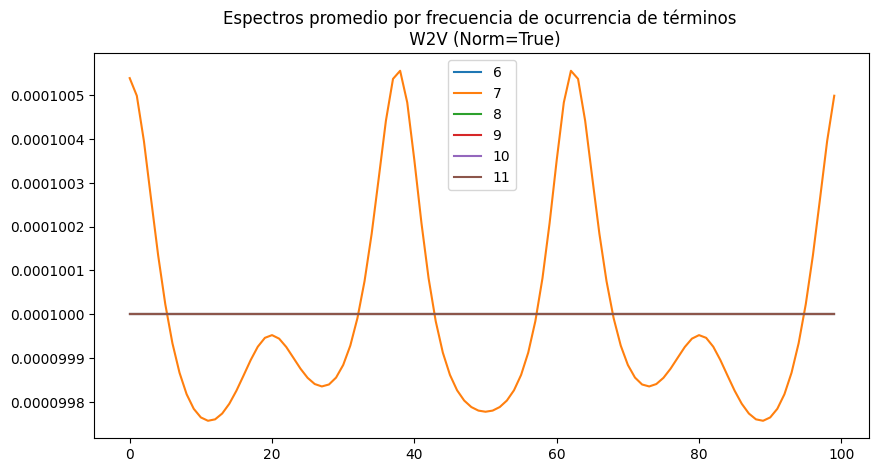

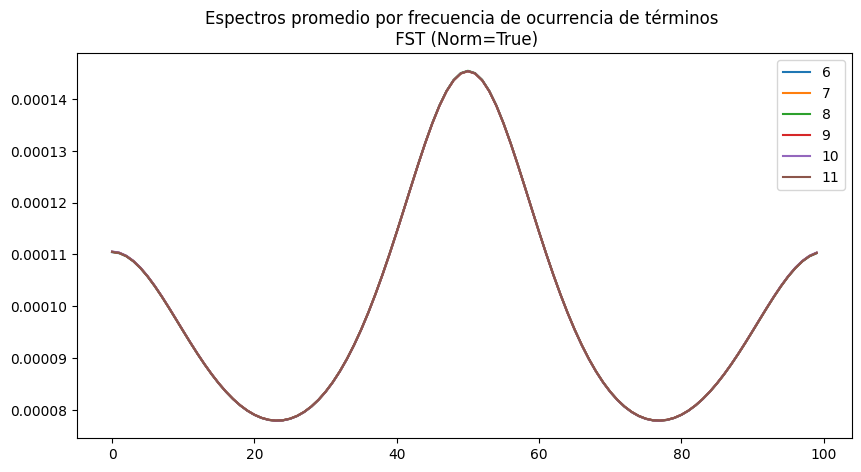

In [27]:
legendw2v = [str(f) for f in list(msw2v.keys())[5:11]]
legendfst = [str(f) for f in list(msw2v.keys())[5:11]]
plt.figure(figsize=(10,5))
for f in list(msw2v.keys())[5:11]:
    plt.plot(msw2v[f])
plt.legend(legendw2v)
plt.title(f"Espectros promedio por frecuencia de ocurrencia de términos \n W2V (Norm=True)")

plt.figure(figsize=(10,5))
for f in list(msfst.keys())[5:11]:
    plt.plot(msfst[f])
plt.legend(legendfst)
plt.title(f"Espectros promedio por frecuencia de ocurrencia de términos \n FST (Norm=True)")

signal.shape: (800,)


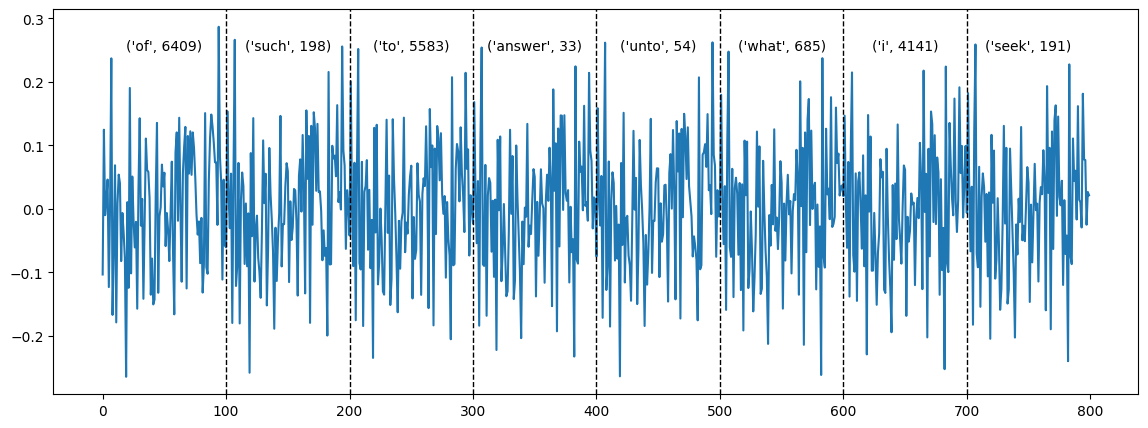

['of', 'such', 'to', 'answer', 'unto', 'what', 'i', 'seek']
(800,)


In [28]:
signal,words_signal = wes.get_signal(datos_em["anticipation"]["w2v"],1,plot=True)
print(words_signal)
print(signal.shape)

## Calculo de embeddings poemas juntos

In [29]:
f = open(data_path+"Poems.json")

poems = pd.DataFrame(json.load(f))

w2v_poems = wes.compute_embeddings(poems, embed="w2v", columna_docs='poem', vec_dim=100)
fst_poems = wes.compute_embeddings(poems, embed="fst", columna_docs='poem', vec_dim=100)

In [30]:
data_poems_w2v = create_line_df(em_poems['anger'])
data_poems_fst = data_poems_w2v.copy()

data_poems_w2v = wes.build_data(data_poems_w2v,'s',w2v_poems,norm=True)
data_poems_fst = wes.build_data(data_poems_fst,'s',fst_poems,norm=True)

Getting TEXT from column: s
Getting TEXT from column: s


In [31]:
msw2v_poems = embed_spectra(data_poems_w2v,w2v_poems,norma=True)
msfst_poems = embed_spectra(data_poems_fst,fst_poems,norma=True)

Text(0.5, 1.0, 'Espectros promedio por frecuencia de ocurrencia de términos \n FST (Norm=True)')

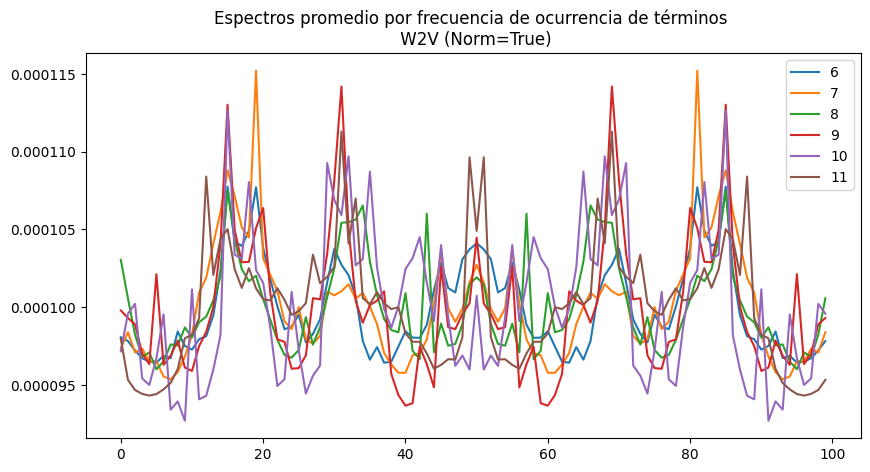

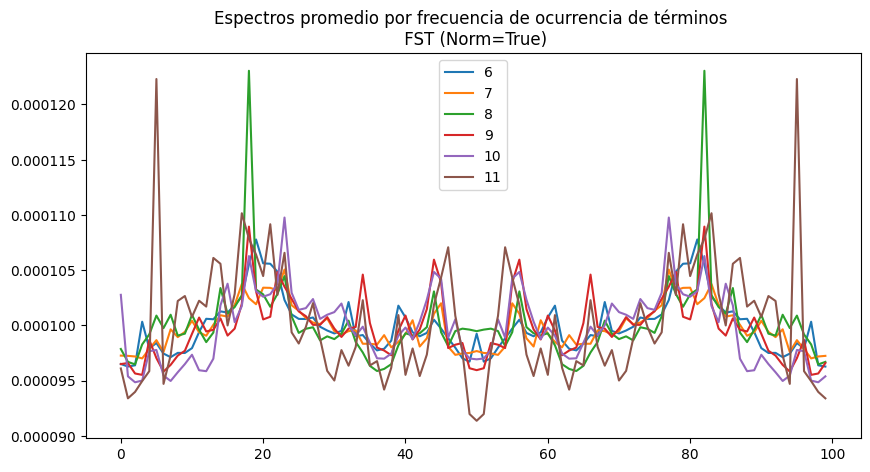

In [32]:
legendw2v = [str(f) for f in list(msw2v_poems.keys())[5:11]]
legendfst = [str(f) for f in list(msfst_poems.keys())[5:11]]
plt.figure(figsize=(10,5))
for f in list(msw2v_poems.keys())[5:11]:
    plt.plot(msw2v_poems[f])
plt.legend(legendw2v)
plt.title(f"Espectros promedio por frecuencia de ocurrencia de términos \n W2V (Norm=True)")

plt.figure(figsize=(10,5))
for f in list(msfst_poems.keys())[5:11]:
    plt.plot(msfst_poems[f])
plt.legend(legendfst)
plt.title(f"Espectros promedio por frecuencia de ocurrencia de términos \n FST (Norm=True)")

In [33]:
data_poems_w2v = create_line_df(em_poems['disgust'])
data_poems_fst = data_poems_w2v.copy()

data_poems_w2v = wes.build_data(data_poems_w2v,'s',w2v_poems,norm=True)
data_poems_fst = wes.build_data(data_poems_fst,'s',fst_poems,norm=True)

Getting TEXT from column: s
Getting TEXT from column: s


In [34]:
msw2v_poems = embed_spectra(data_poems_w2v,w2v_poems,norma=True)
msfst_poems = embed_spectra(data_poems_fst,fst_poems,norma=True)

Text(0.5, 1.0, 'Espectros promedio por frecuencia de ocurrencia de términos \n FST (Norm=True)')

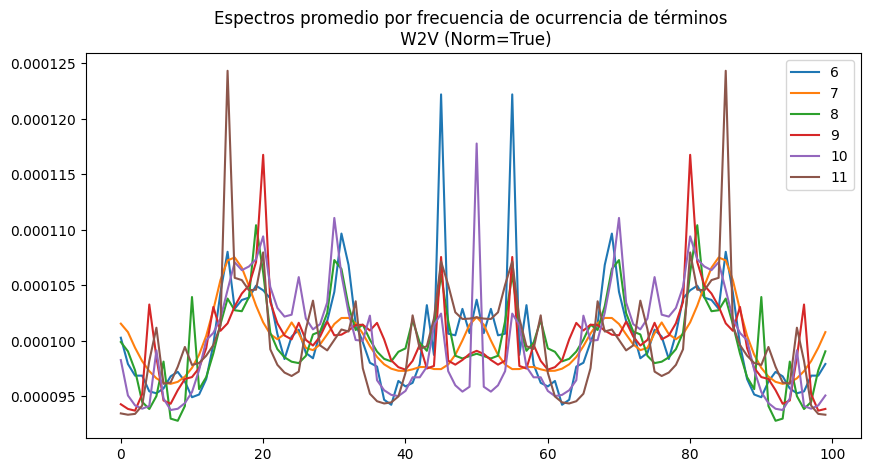

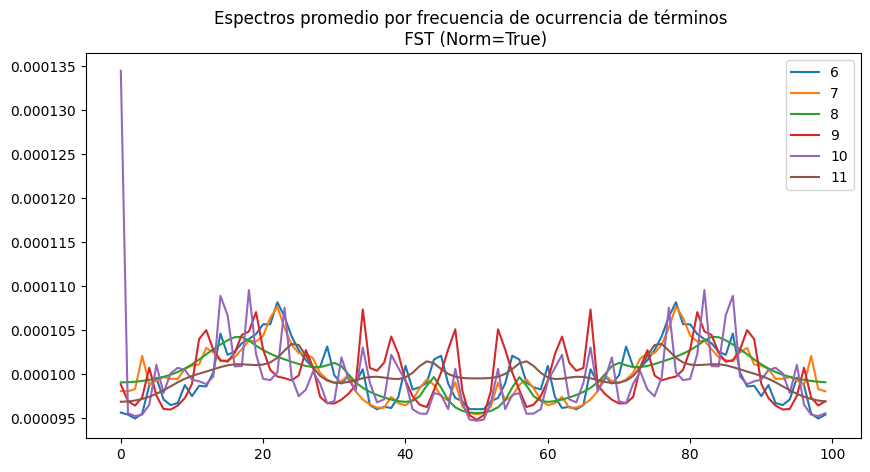

In [35]:
legendw2v = [str(f) for f in list(msw2v_poems.keys())[5:11]]
legendfst = [str(f) for f in list(msfst_poems.keys())[5:11]]
plt.figure(figsize=(10,5))
for f in list(msw2v_poems.keys())[5:11]:
    plt.plot(msw2v_poems[f])
plt.legend(legendw2v)
plt.title(f"Espectros promedio por frecuencia de ocurrencia de términos \n W2V (Norm=True)")

plt.figure(figsize=(10,5))
for f in list(msfst_poems.keys())[5:11]:
    plt.plot(msfst_poems[f])
plt.legend(legendfst)
plt.title(f"Espectros promedio por frecuencia de ocurrencia de términos \n FST (Norm=True)")

In [36]:
datos_poems_em = {}

for e in emotion_list:
    datos_poems_em[e] = {}

    datosfst = create_line_df(em_poems[e])
    datosw2v = datosfst.copy()

    datosw2v = wes.build_data(datosw2v,'s',w2v_poems,norm=True)
    datosfst = wes.build_data(datosfst,'s',fst_poems,norm=True)

    datos_poems_em[e]["w2v"] = datosw2v
    datos_poems_em[e]["fst"] = datosfst

display(datos_poems_em["anger"]["w2v"])
display(datos_poems_em["anger"]["fst"])

Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s
Getting TEXT from column: s


,s,gid,signal,TokenS
0,whate'er keen vengeance urged on foreign foe,31061,"[-0.01540429424494505, 0.08817712962627411, 0....","[(keen, 7), (vengeance, 37), (urged, 6), (on, ..."
1,and each trunk a spine,21055,"[-0.05419768765568733, 0.11606232076883316, 0....","[(and, 3022), (each, 93), (trunk, 2), (a, 1666..."
2,sounds like doris day shooting,26921,"[-0.13979241251945496, 0.02446204423904419, 0....","[(sounds, 10), (like, 289), (doris, 1), (day, ..."
3,the water is wide i can't cross over,90143,"[-0.004788870923221111, 0.12304709851741791, 0...","[(the, 5050), (water, 33), (is, 657), (wide, 1..."
4,oh may the storm that pours on me,31697,"[-0.09822540730237961, -0.026943909004330635, ...","[(oh, 24), (may, 113), (the, 5050), (storm, 15..."
...,...,...,...,...
10465,so they contended daily but the strife,23994,"[-0.004472896456718445, 0.018554236739873886, ...","[(so, 285), (they, 351), (contended, 1), (dail..."
10466,crumbles away and i am left alone,68890,"[-0.17190267145633698, 0.127439484000206, 0.00...","[(crumbles, 1), (away, 72), (and, 3022), (i, 1..."
10467,he's throwing fits and now he fights,8082,"[0.08995307981967926, 0.07298723608255386, 0.1...","[(he, 547), (throwing, 2), (fits, 9), (and, 30..."
10468,but what dy'e think my trusty fier,42742,"[0.041578978300094604, 0.04847376421093941, 0....","[(but, 453), (what, 228), (dy, 1), (e, 20), (t..."


,s,gid,signal,TokenS
0,i'll pledge my aith in guid braid scotch,42327,"[-0.02111022360622883, -0.049256257712841034, ...","[(i, 1144), (pledge, 3), (my, 571), (aith, 2),..."
1,to fall in battle by the sword of his adversar...,77961,"[-0.015282404609024525, 0.0013428499223664403,...","[(to, 1536), (fall, 26), (in, 1463), (battle, ..."
2,i give way to you,7997,"[-0.02111022360622883, -0.049256257712841034, ...","[(i, 1144), (give, 37), (way, 77), (to, 1536),..."
3,and the eye sews along,23745,"[-0.08744274824857712, -0.2913419008255005, -0...","[(and, 2946), (the, 4923), (eye, 31), (sews, 1..."
4,the crests of the sea,24299,"[-0.06140074506402016, 0.033335406333208084, 0...","[(the, 4923), (crests, 2), (of, 2022), (the, 4..."
...,...,...,...,...
10102,for she gives men as great as the sea,25021,"[-0.09221982210874557, -0.038474492728710175, ...","[(for, 517), (she, 221), (gives, 19), (men, 10..."
10103,the greed that coveted gold beyond renown,71894,"[-0.06140074506402016, 0.033335406333208084, 0...","[(the, 4923), (greed, 12), (that, 809), (covet..."
10104,never to me or quite this way,8384,"[0.05672043189406395, -0.1677708774805069, 0.0...","[(never, 111), (to, 1536), (me, 331), (or, 287..."
10105,the battle horse and foot before the fleet,44372,"[-0.06140074506402016, 0.033335406333208084, 0...","[(the, 4923), (battle, 125), (horse, 5), (and,..."


## PCA para observación

In [37]:
def embed_spectra_list(df,modelo,norma=False):
    freqs = {}
    for l in df.TokenS.values.tolist(): 
        for w,f in l:
            if f not in freqs:
                freqs[f] = [w]
            else:
                freqs[f].append(w)
    freqs = dict(sorted(freqs.items(), key=lambda item: item[0]))
    ms = {}
    for f in freqs.keys():
        s = []
        for w in freqs[f]:
            data = modelo.wv.get_vector(w,norm=norma)
            _,spectrum = wes.get_spectra_predict(data,predict=False)
            s.append(spectrum[1])
        ms[f] = s
    return ms

### W2V

In [38]:
anger_w_dic = embed_spectra_list(datos_poems_em["anger"]["w2v"],w2v_poems,norma=True)
disgust_w_dic = embed_spectra_list(datos_poems_em["disgust"]["w2v"],w2v_poems,norma=True)

In [39]:
#Preparamos a X
X = anger_w_dic[10].copy()
X.extend(disgust_w_dic[10])
X = np.array(X)
X.shape

(1270, 100)

In [40]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.23961918 0.18223269]


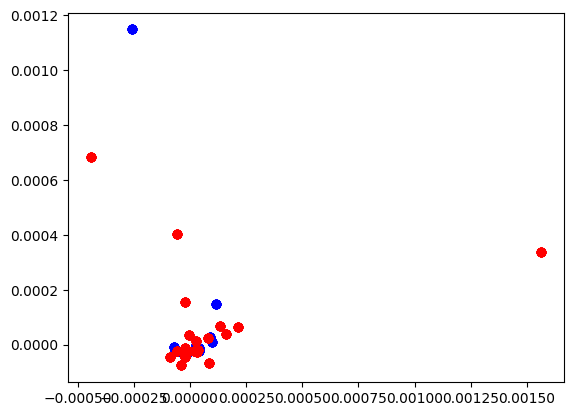

In [41]:
anger = X[:len(anger_w_dic[10]),:]
disgust = X[len(anger_w_dic[10]):,:]

plt.scatter(disgust[:,0],disgust[:,1],c="blue")
plt.scatter(anger[:,0],anger[:,1],c="red")

plt.show()

### FST

In [42]:
anger_w_dic = embed_spectra_list(datos_poems_em["anger"]["fst"],fst_poems,norma=True)
disgust_w_dic = embed_spectra_list(datos_poems_em["disgust"]["fst"],fst_poems,norma=True)

In [43]:
#Preparamos a X
X = anger_w_dic[10].copy()
X.extend(disgust_w_dic[10])
X = np.array(X)
X.shape

(1320, 100)

In [44]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.58162434 0.15299411]


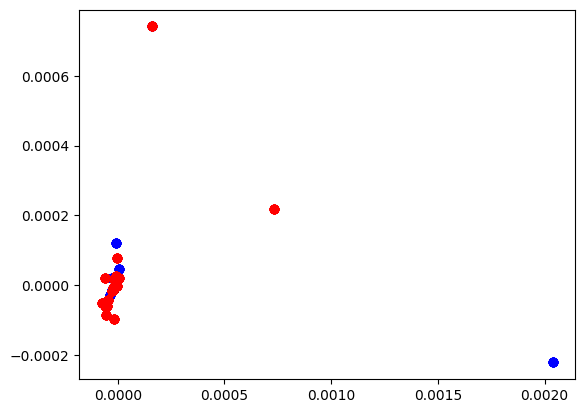

In [45]:
anger = X[:len(anger_w_dic[10]),:]
disgust = X[len(anger_w_dic[10]):,:]

plt.scatter(disgust[:,0],disgust[:,1],c="blue")
plt.scatter(anger[:,0],anger[:,1],c="red")

plt.show()